In [40]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly.offline import iplot , plot 
from plotly.subplots import make_subplots

In [14]:
df = pd.read_csv('/kaggle/input/covid19-dataset/Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [13]:
df.shape

(1048575, 21)

In [15]:
for col in df.columns:
    print (col)

USMER
MEDICAL_UNIT
SEX
PATIENT_TYPE
DATE_DIED
INTUBED
PNEUMONIA
AGE
PREGNANT
DIABETES
COPD
ASTHMA
INMSUPR
HIPERTENSION
OTHER_DISEASE
CARDIOVASCULAR
OBESITY
RENAL_CHRONIC
TOBACCO
CLASIFFICATION_FINAL
ICU


In [17]:
df.sample(4)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
147067,1,4,2,1,9999-99-99,97,2,31,97,2,...,2,2,2,2,2,1,2,1,3,97
311476,1,4,1,1,9999-99-99,97,2,28,2,2,...,2,1,2,1,2,2,2,2,7,97
508778,2,12,1,1,9999-99-99,97,2,26,2,2,...,2,2,2,2,2,1,2,2,3,97
498310,1,12,2,2,9999-99-99,2,1,51,97,2,...,2,2,2,2,2,1,2,1,3,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [19]:
df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [21]:
df.duplicated().any

<bound method Series.any of 0          False
1          False
2          False
3          False
4          False
           ...  
1048570     True
1048571    False
1048572    False
1048573     True
1048574    False
Length: 1048575, dtype: bool>

In [23]:
df.tail(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [24]:
df.duplicated().sum()

812049

In [26]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [27]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000
mean,1.512337,7.634230,1.547521,1.577712,44.238401,4.525765,52.620274,54.794826,2.840855,2.966976,2.949325,3.135630,2.691319,3.687645,2.980767,2.768863,2.954956,2.973352,4.781263,44.371008
std,0.499849,3.661318,0.497738,0.493925,47.394072,16.731469,19.318869,47.225449,10.500621,9.882551,9.839247,10.619391,10.098528,12.930442,10.026841,9.959472,9.888310,10.289529,1.897253,47.337447
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,40.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,6.000000,2.000000,2.000000,2.000000,2.000000,54.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000
75%,2.000000,12.000000,2.000000,2.000000,97.000000,2.000000,67.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,13.000000,2.000000,2.000000,99.000000,99.000000,121.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


In [30]:
df.drop(['INTUBED','ICU'], axis = 1, inplace = True)
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,97,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09/06/2020,2,55,97,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,97,1,2,2,2,1,2,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,9999-99-99,2,47,97,1,2,2,2,2,2,2,2,2,2,7
1048569,1,13,1,2,9999-99-99,2,56,2,1,2,2,2,2,2,2,2,2,2,7
1048571,1,13,2,2,9999-99-99,2,51,97,2,2,2,2,1,2,2,2,2,2,7
1048572,2,13,2,1,9999-99-99,2,55,97,2,2,2,2,2,2,2,2,2,2,7


In [32]:
df.shape

(236526, 19)

# Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


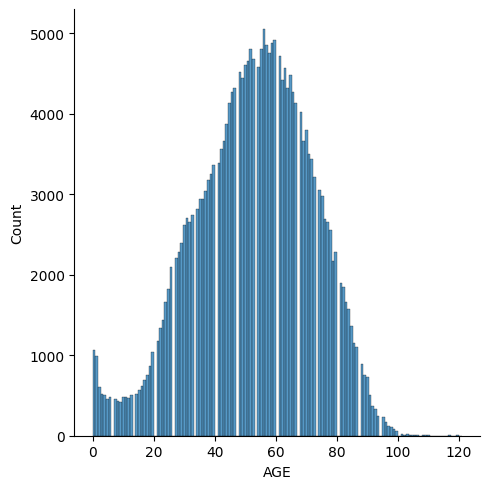

In [34]:
sns.displot(df['AGE'])

In [42]:
top_age=df['AGE'].value_counts().sort_values(ascending=True)[:10]
top_age

AGE
113    1
121    1
111    1
116    2
114    2
115    2
118    2
119    2
117    3
110    4
Name: count, dtype: int64

In [43]:
iplot(px.bar(top_age,
             color=top_age.index,
             text_auto=True,
             labels={'index':'largest of age'},
             title='Top 10 age in Covid19',
))

In [48]:
top_pregnant = df.groupby('DATE_DIED')['PREGNANT'].mean().sort_values(ascending=False)[:10]
top_pregnant

DATE_DIED
01/01/2021    97.0
25/09/2020    97.0
26/01/2021    97.0
15/09/2020    97.0
26/02/2021    97.0
26/03/2021    97.0
14/10/2020    97.0
14/09/2020    97.0
14/04/2021    97.0
14/03/2021    97.0
Name: PREGNANT, dtype: float64

In [49]:
iplot(px.bar(top_pregnant,
             color=top_pregnant.index,
             text_auto=True,
             labels={'index':'largest of pregnant'},
             title='Top 10 Pregnant in Covid19',
))

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



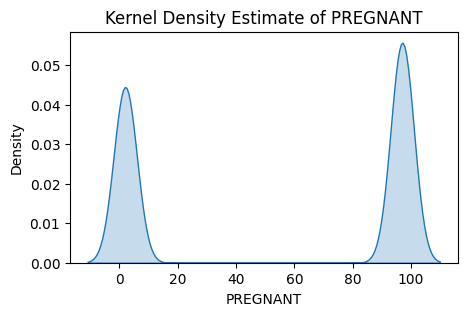

In [52]:
plt.figure(figsize=(5,3))
sns.kdeplot(df['PREGNANT'],fill=True)
plt.xlabel('PREGNANT')
plt.title('Kernel Density Estimate of PREGNANT')
plt.show()

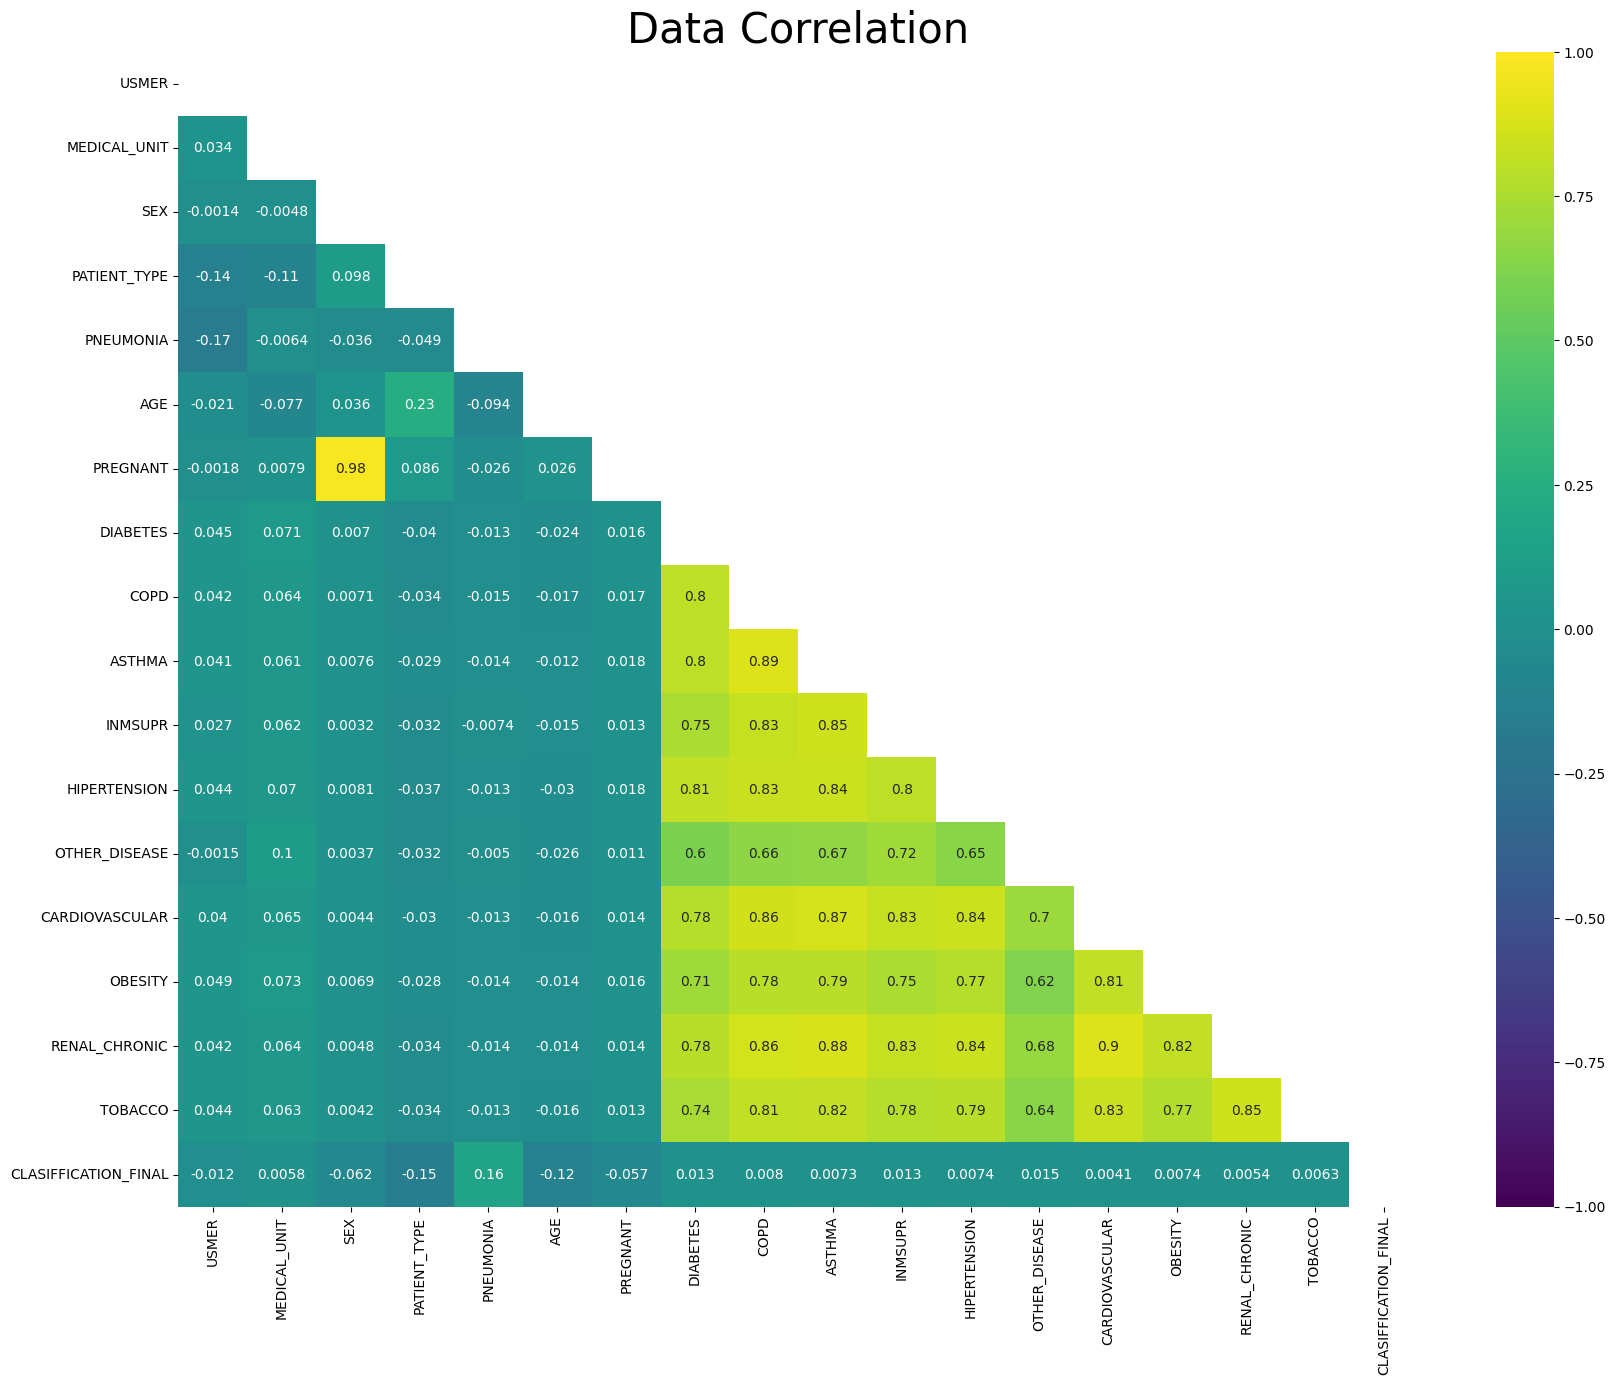

In [57]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df.drop(columns=['DATE_DIED']).corr()))
sns.heatmap(df.drop(columns=['DATE_DIED']).corr(), mask = mask, annot = True, cmap = "viridis", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize = 30)
plt.show()

In [61]:
df.loc[df.DATE_DIED=="9999-99-99","DATE_DIED"]=0
df.loc[df.DATE_DIED!=0,"DATE_DIED"]=1
df.rename(columns={"DATE_DIED":"DIED"},inplace=True)
df.DIED.value_counts(normalize=True)*100

DIED
0    67.883023
1    32.116977
Name: proportion, dtype: float64

In [63]:
columns=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA',
       'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL']

In [65]:
category_columns=[columns for columns in columns if df[columns].nunique()<15]
category_columns

['USMER',
 'MEDICAL_UNIT',
 'SEX',
 'PATIENT_TYPE',
 'PNEUMONIA',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'CLASIFFICATION_FINAL']

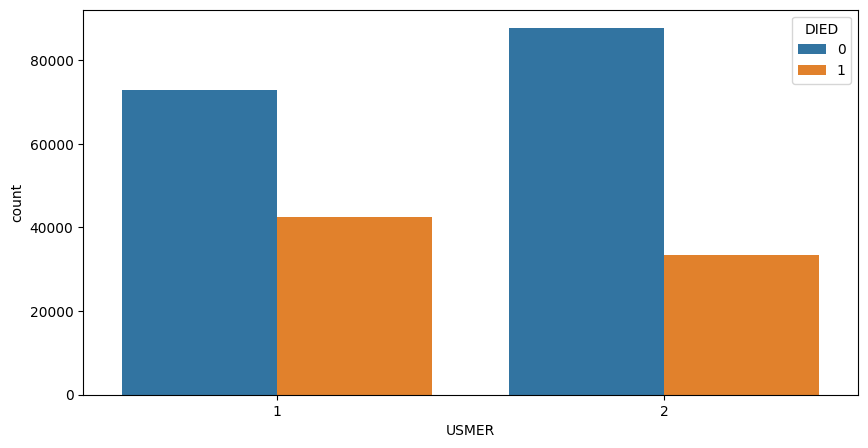

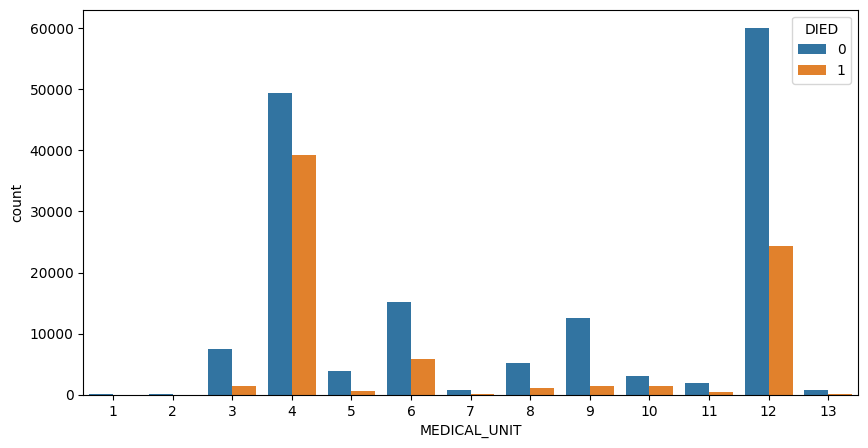

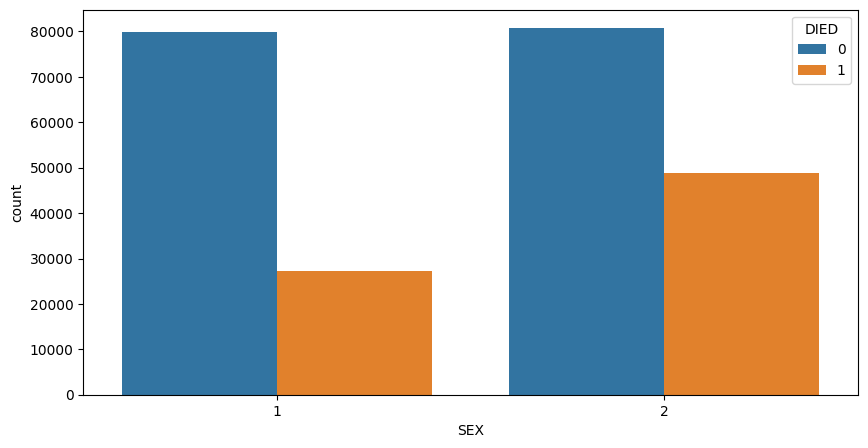

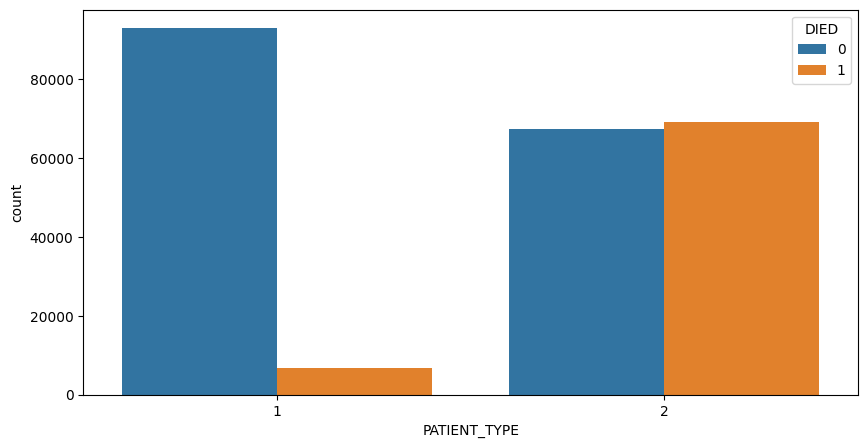

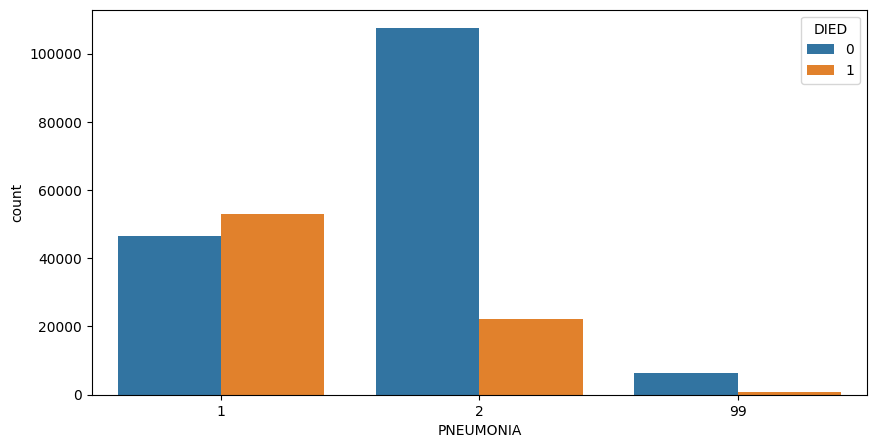

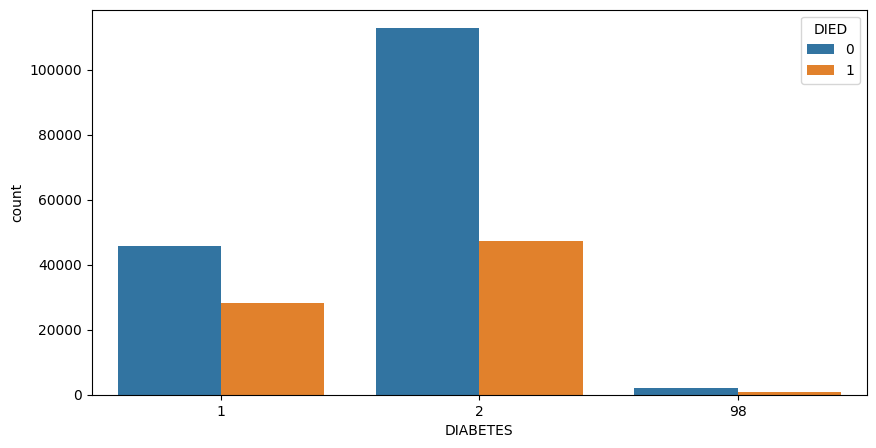

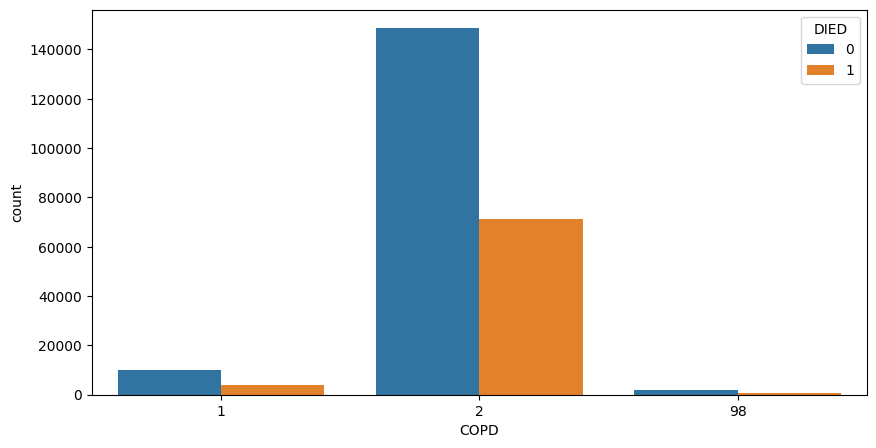

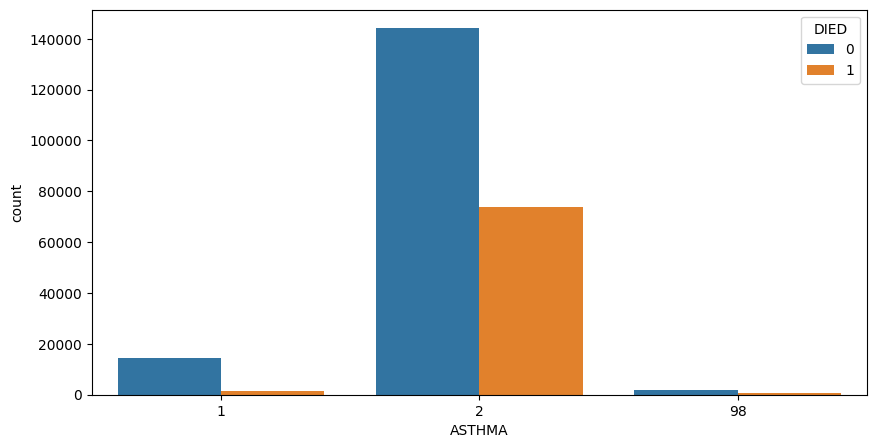

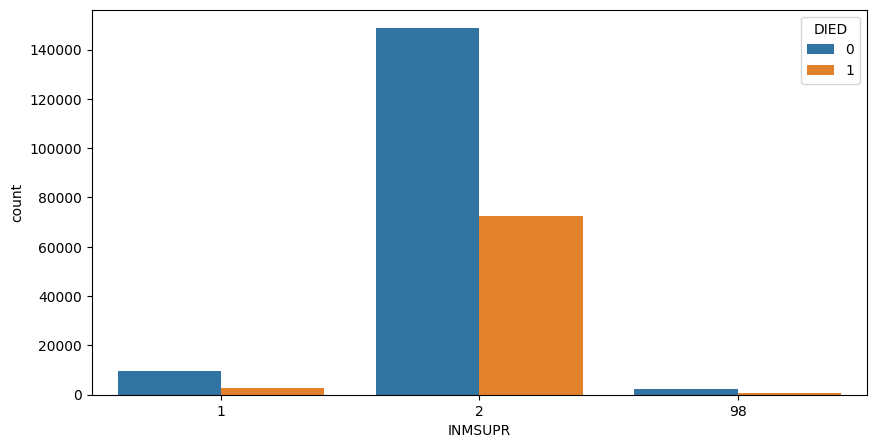

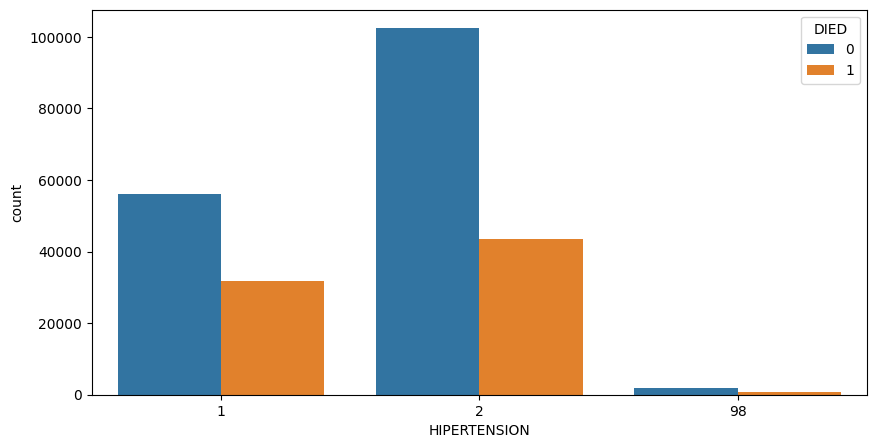

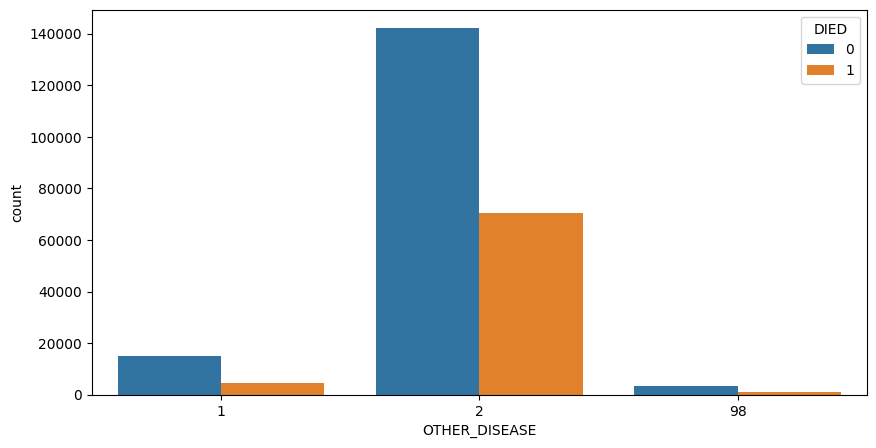

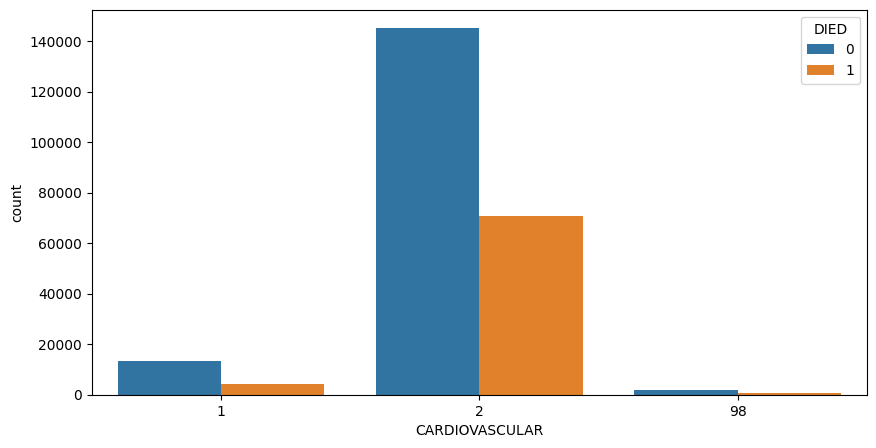

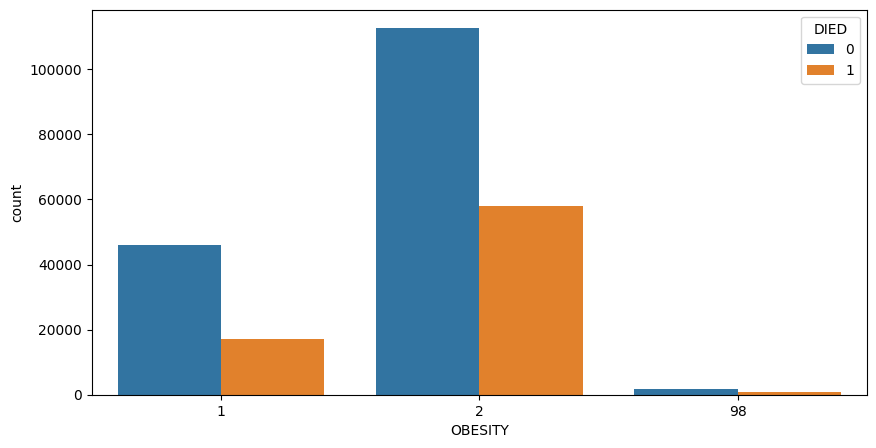

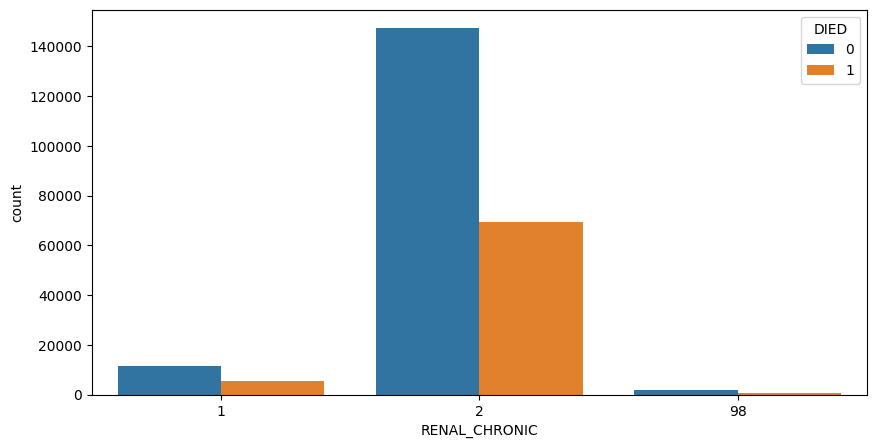

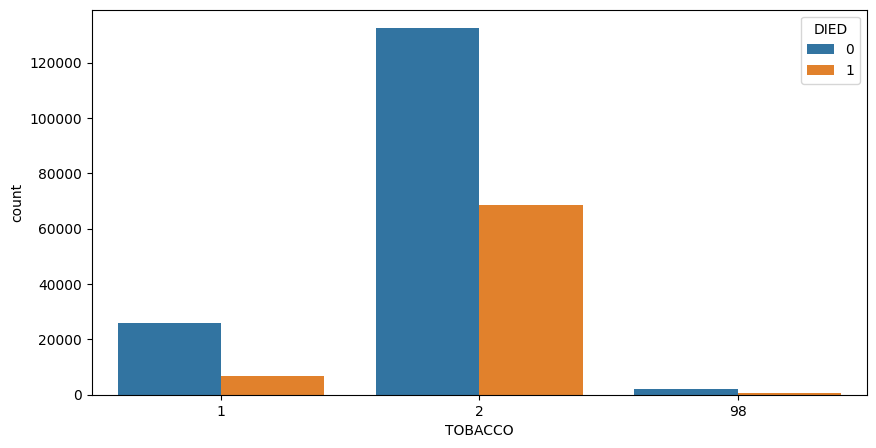

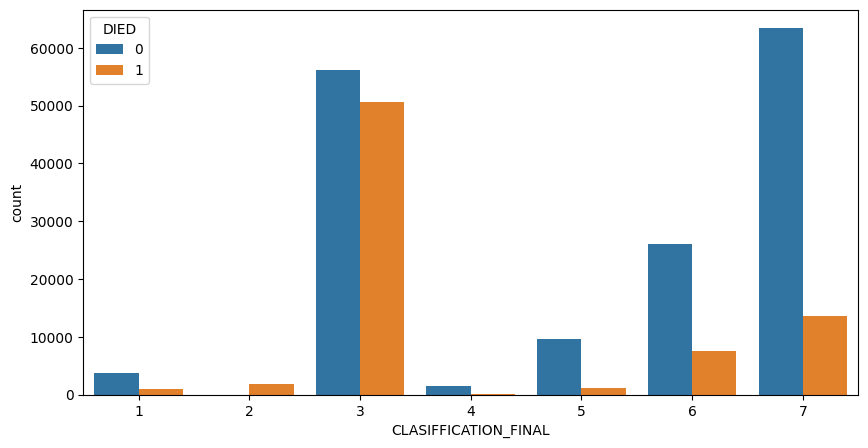

In [75]:
for columns in category_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=df[columns], hue=df['DIED'])